In [1]:
%run init_notebook.py
from settings import *

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Simple Solow

Solow formulas
$$ Y(t) = DK^\alpha (AL)^{(1-\alpha)}$$
$$ \hat{y}(t) = \frac{Y(t)}{L(t)A(t)}= (D \hat{k})^\alpha$$

Growth rates
$$ \dot{A}(t) = A(t)\mu$$
$$ \dot{L}(t) = L(t)n$$


Solving the model


$$ \dot{\hat{k}} = sf(\hat{k}) - \delta \hat{k} = s(D\hat{k})^\alpha - (\delta + n + \mu) \hat{k}$$

$$ \hat{k}_{ss} = \frac{sD^{\alpha}}{\delta + n + \mu}^{\frac{1}{1-\alpha}}$$

$$ \hat{k}_{gold} = \frac{\alpha D^{\alpha}}{\delta + n + \mu}^{\frac{1}{1-\alpha}}$$

In [3]:
params = sp.symbols(['k(t)', 'alpha', 'n', 's', 'delta', 'mu', 'D'])
kt, alpha, n, s, delta, mu, D = params

In [4]:
yt = D**alpha * kt**alpha 
depr = (delta + n + mu)
k_dot = s*yt - depr*kt # law of motion
k_ss = sp.solve(k_dot, kt)[0]
c_ss = yt - depr*kt
k_gold = sp.solve(c_ss.diff(kt), kt)[0]

make_yt = sp.lambdify(params, yt)
make_kdot = sp.lambdify(params, k_dot)
make_kss = sp.lambdify(params, k_ss)
make_kgold = sp.lambdify(params, k_gold)

In [5]:
k_dot

D**alpha*k(t)**alpha*s - k(t)*(delta + mu + n)

In [6]:
k_ss

(D**alpha*s/(delta + mu + n))**(-1/(alpha - 1))

In [7]:
k_gold

((delta + mu + n)/(D**alpha*alpha))**(1/(alpha - 1))

### Simulations

In [8]:
iterations = 100

In [13]:
# params
k0 = .001
α = .5
nL = .02
δ = .025
sav = .7
μ = .1
Du = 1

deprec = (δ + nL + μ)

kss = make_kss(20, α, nL, sav, δ, μ, Du)
kgold = make_kgold(20, α, nL, sav, δ, μ, Du)

In [14]:
# model
out_kt = np.linspace(k0, max(kss, kgold)*1.4, iterations)

out_yt = np.zeros(iterations)
out_kdot = np.zeros(iterations)
out_ct = np.zeros(iterations)
out_yt[0] = 0.0000001

for i in range(1, iterations):
    out_kdot[i-1] = make_kdot(out_kt[i-1], α, nL, sav, δ, μ, Du)
    out_yt[i] = make_yt(out_kt[i], α, nL, sav, δ, μ, Du)
    out_ct[i] = out_yt[i] - deprec * out_kt[i]

Steady State kt: 23.305588585017833
Steady State kt: 11.890606420927469


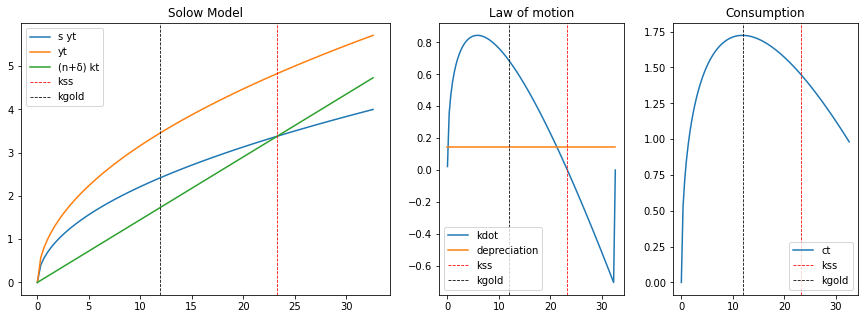

In [15]:
# plot
gs_kw = dict(width_ratios=[2, 1, 1])

fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw=gs_kw)

ax[0].plot(out_kt, out_yt*sav, label='s yt')
ax[0].plot(out_kt, out_yt, label='yt')
ax[0].plot(out_kt, deprec*out_kt, label='(n+δ) kt')


ax[1].plot(out_kt, out_kdot, label='kdot')
ax[1].plot(out_kt, list([deprec]*len(out_kt)), label='depreciation')
ax[2].plot(out_kt, out_ct, label='ct')


ax[0].axvline(x=kss, color='red', linestyle='dashed', linewidth=.8, label='kss')
ax[0].axvline(x=kgold, color='black', linestyle='dashed', linewidth=.8, label='kgold')

ax[1].axvline(x=kss, color='red', linestyle='dashed', linewidth=.8, label='kss')
ax[1].axvline(x=kgold, color='black', linestyle='dashed', linewidth=.8, label='kgold')

ax[2].axvline(x=kss, color='red', linestyle='dashed', linewidth=.8, label='kss')
ax[2].axvline(x=kgold, color='black', linestyle='dashed', linewidth=.8, label='kgold')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title('Solow Model')
ax[1].set_title('Law of motion')
ax[2].set_title('Consumption')
;

print(f'Steady State kt: {kss}')
print(f'Steady State kt: {kgold}')